# PRINCIPAL COMPONENT ANALYSIS (PCA) for Dimensionality Reduction -> Feature Extraction

In [4]:
from keras.datasets import cifar10
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
import cv2
import pickle

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import time

In [6]:
classLabel = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [7]:
# since every value in image is ranging from 0 to 255, need to normalize the data to uniform range of 0-1 , diving by 255
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train1 = X_train.reshape((len(X_train),-1))
print(X_train1.shape)
X_test1 = X_test.reshape((len(X_test),-1))
print(X_test1.shape)

(50000, 3072)
(10000, 3072)


In [9]:
y_train1 = y_train.flatten()
print(y_train1.shape)
y_test1 = y_test.flatten()
print(y_test1.shape)

(50000,)
(10000,)


In [2]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA().fit(X_train1)

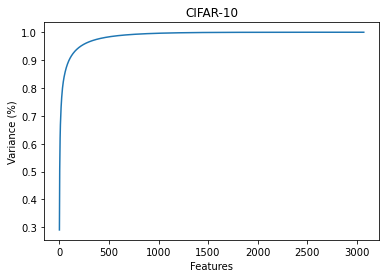

In [11]:
# visualizing variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Features")
plt.ylabel("Variance (%)")
plt.title("CIFAR-10")
plt.show()

In [12]:
# out of 3072 -> 500 features are important as they retain almost 95% of the data 
pca = PCA(n_components=500)
pca.fit(X_train1)

with open("pca.pkl","wb") as f:
    pickle.dump(pca,f)

X_train1_pca = pca.transform(X_train1)
X_test1_pca = pca.transform(X_test1)

In [17]:
X_train1_pca.shape

(50000, 500)

In [16]:
X_test1_pca.shape

(10000, 500)

4 DATA -> X_train1_pca , y_train1 , X_test1_pca , y_test1

## Training Models with Extracted Features

### 1. K-Nearest Neigbour

In [14]:
from sklearn.neighbors import KNeighborsClassifier
KNN_PCA = KNeighborsClassifier(n_neighbors=5)
KNN_PCA.fit(X_train1_pca,y_train1)

KNeighborsClassifier()

In [15]:
with open("knn_pca.pkl","wb") as f:
    pickle.dump(KNN_PCA,f)

In [18]:
knn_pred = KNN_PCA.predict(X_test1_pca)

In [27]:
acc11 = accuracy_score(knn_pred,y_test1)
print("Accuracy Score (KNN using PCA) :",accuracy_score(knn_pred,y_test1))
print("Confusion matrix (KNN using PCA)\n",confusion_matrix(knn_pred,y_test1))

Accuracy Score (KNN using PCA) : 0.3475
Confusion matrix (KNN using PCA)
 [[551 142 117  75  67  69  21  94 140 149]
 [  5 220   3   7   2   4   1  13  14  73]
 [113  99 446 232 265 219 247 181  54  97]
 [ 15  41  48 207  34 152  69  47  34  62]
 [ 55 156 223 188 508 187 305 272  54 120]
 [  6  31  33 110  21 221  36  49  14  25]
 [ 30  63  71 112  48  82 292  65  15  55]
 [  4   9  12  22  10  12   1 214   8  30]
 [214 213  45  43  44  48  27  61 661 234]
 [  7  26   2   4   1   6   1   4   6 155]]


In [28]:
print("Classification Report (KNN using PCA) :\n",classification_report(knn_pred,y_test1))

Classification Report (KNN using PCA) :
               precision    recall  f1-score   support

           0       0.55      0.39      0.45      1425
           1       0.22      0.64      0.33       342
           2       0.45      0.23      0.30      1953
           3       0.21      0.29      0.24       709
           4       0.51      0.25      0.33      2068
           5       0.22      0.40      0.29       546
           6       0.29      0.35      0.32       833
           7       0.21      0.66      0.32       322
           8       0.66      0.42      0.51      1590
           9       0.15      0.73      0.26       212

    accuracy                           0.35     10000
   macro avg       0.35      0.44      0.34     10000
weighted avg       0.44      0.35      0.36     10000



### 2. Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
DTC_PCA = DecisionTreeClassifier() # gini
DTC_PCA.fit(X_train1_pca,y_train1)

DecisionTreeClassifier()

In [31]:
with open("dtc_pca.pkl","wb") as f:
    pickle.dump(DTC_PCA,f)

In [32]:
dtc_pred = DTC_PCA.predict(X_test1_pca)
acc12 = accuracy_score(dtc_pred,y_test1)
print("Accuracy Score (Decision Tree using PCA) :",accuracy_score(dtc_pred,y_test1))
print("Confusion matrix (Decision Tree using PCA)\n",confusion_matrix(dtc_pred,y_test1))
print("Classification Report (Decision Tree using PCA)\n",classification_report(dtc_pred,y_test1))

Accuracy Score (Decision Tree using PCA) : 0.2459
Confusion matrix (Decision Tree using PCA)
 [[348  87 107  78  61  52  55  78 136  90]
 [ 64 283  47  85  38  56  47  73  91 154]
 [102  58 211 118 161 122 133  81  65  64]
 [ 63  64 108 168  89 183 123  95  62  87]
 [ 56  70 134  85 224  95 129 108  44  44]
 [ 63  71 103 150  92 189 110 128  65  60]
 [ 38  54 118  94 125 109 236  89  31  54]
 [ 54  68  87 101 114  97  89 205  59 105]
 [156  84  51  60  46  52  43  64 349  96]
 [ 56 161  34  61  50  45  35  79  98 246]]
Classification Report (Decision Tree using PCA)
               precision    recall  f1-score   support

           0       0.35      0.32      0.33      1092
           1       0.28      0.30      0.29       938
           2       0.21      0.19      0.20      1115
           3       0.17      0.16      0.16      1042
           4       0.22      0.23      0.23       989
           5       0.19      0.18      0.19      1031
           6       0.24      0.25      0.24    

### 3. Naive Bayes 

In [33]:
from sklearn.naive_bayes import GaussianNB
# since data is normally distributed

In [34]:
GNB_PCA = GaussianNB()
GNB_PCA.fit(X_train1_pca,y_train1)

GaussianNB()

In [35]:
with open("gnb_pca.pkl","wb") as f:
    pickle.dump(GNB_PCA,f)

In [36]:
gnb_pred = GNB_PCA.predict(X_test1_pca)
acc13 = accuracy_score(gnb_pred,y_test1)
print("Accuracy Score (Gaussian Naive Bayes using PCA) :",accuracy_score(gnb_pred,y_test1))
print("Confusion matrix (Gaussian Naive Bayes using PCA)\n",confusion_matrix(gnb_pred,y_test1))
print("Classification Report (Gaussian Naive Bayes using PCA)\n",classification_report(gnb_pred,y_test1))

Accuracy Score (Gaussian Naive Bayes using PCA) : 0.2915
Confusion matrix (Gaussian Naive Bayes using PCA)
 [[111  38  28  24  15  16  12  26  48  53]
 [ 85 465  58  69  39  70 124  80 115 137]
 [ 47  14 102  83  39  82  35  41  21  23]
 [ 34  65  53 134  23  88  26  54  37  69]
 [289  32 446 264 611 264 360 196 220  46]
 [ 14  22  37  83  20 133  10  47  18  24]
 [ 32  27  71  38  78  36 267  31  24  26]
 [ 55  70  40  82  61  83  37 238  32  80]
 [222 108  63  71  36  68  24  47 417 105]
 [111 159 102 152  78 160 105 240  68 437]]
Classification Report (Gaussian Naive Bayes using PCA)
               precision    recall  f1-score   support

           0       0.11      0.30      0.16       371
           1       0.47      0.37      0.41      1242
           2       0.10      0.21      0.14       487
           3       0.13      0.23      0.17       583
           4       0.61      0.22      0.33      2728
           5       0.13      0.33      0.19       408
           6       0.27   

### 4. Support Vector Classifier

In [37]:
from sklearn.svm import SVC

In [ ]:
start = time.time()

svc_pca = SVC(kernel="rbf")
svc_pca.fit(X_train1_pca,y_train1)

end = time.time()
print("Time Taken (SVM using PCA) :",(end-start)/60,"minutes")

In [ ]:
with open("svc_pca.pkl","wb") as f:
    pickle.dump(svc_pca,f)

In [ ]:
svc_pred = svc_pca.predict(X_test1_pca)
acc14 = accuracy_score(svc_pred,y_test1)
print("Accuracy Score (Support Vector Machines using PCA) :",accuracy_score(svc_pred,y_test1))
print("Confusion matrix (Support Vector Machines using PCA)\n",confusion_matrix(svc_pred,y_test1))
print("Classification Report (Support Vector Machines using PCA)\n",classification_report(svc_pred,y_test1))

### 5. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_PCA = LogisticRegression(solver="sag",multi_class="ovr",verbose=1,n_jobs=-1) # one vs rest (ovr) , n_jobs = -1 (computation across cpu)
lr_pca = LR_PCA.fit(X_train1_pca,y_train1)

lr_pred = LR_PCA.predict(X_test1_pca)

In [ ]:
with open("logr_pca.pkl","wb") as f:
    pickle.dump(LR_PCA,f)

In [ ]:
acc15 = accuracy_score(lr_pred,y_test1)
print("Accuracy Score (Logistic Regression using PCA):",accuracy_score(lr_pred,y_test1))
print("Confusion matrix (Logistic Regression using PCA):\n",confusion_matrix(lr_pred,y_test1))
print("Classification Report (Logistic Regression using PCA)\n",classification_report(lr_pred,y_test1))

### 6. MLP Classifier 

In [ ]:
from sklearn.neural_network import MLPClassifier  
MLP_PCA = MLPClassifier(hidden_layer_sizes=(150,100,50),activation="relu",
                    solver="adam",learning_rate="constant",learning_rate_init=0.001,
                    max_iter=500,verbose=True)

nn_pca = MLP_PCA.fit(X_train1_pca,y_train1)

mlp_pred = MLP_PCA.predict(X_test1_pca)

In [ ]:
with open("mlp_pca.pkl","wb") as f:
    pickle.dump(MLP_PCA,f)

In [ ]:
acc16 = accuracy_score(mlp_pred,y_test1)
print("Accuracy Score (Multi Layer Perceptron using PCA):",accuracy_score(mlp_pred,y_test1))
print("Confusion matrix (Multi Layer Perceptron using PCA):\n",confusion_matrix(mlp_pred,y_test1))
print("Classification Report (Multi Layer Perceptron using PCA)\n",classification_report(mlp_pred,y_test1))

### 7. Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
# ensemble technique -> multiple random decision tree and take majority of it

In [39]:
RFC_PCA = RandomForestClassifier()  # n_estimators = 100 (100 random trees)
RFC_PCA.fit(X_train1_pca,y_train1)

rfc_pred = RFC_PCA.predict(X_test1_pca)

In [40]:
with open("rfc_pca.pkl","wb") as f:
    pickle.dump(RFC_PCA,f)

In [41]:
acc17 = accuracy_score(rfc_pred,y_test1)
print("Accuracy Score (Random Forest Classifier using PCA) :",accuracy_score(rfc_pred,y_test1))
print("Confusion matrix (Random Forest Classifier using PCA)\n",confusion_matrix(rfc_pred,y_test1))
print("Classification Report (Random Forest Classifier using PCA)\n",classification_report(rfc_pred,y_test))

Accuracy Score (Random Forest Classifier using PCA) : 0.3969
Confusion matrix (Random Forest Classifier using PCA)
 [[520  37 132  55  49  46  14  58 117  61]
 [ 60 528  37  72  27  56  56  75 107 228]
 [ 50  24 243  93 169  98  97  57  14  19]
 [ 37  41  94 224  79 198  85  84  33  45]
 [ 36  17 176  72 346  75 116  85  15  12]
 [ 28  40  80 203  51 300  69  85  45  32]
 [ 18  27 108 117 149  69 466  47  13  34]
 [ 34  41  58  68  58  82  38 356  21  51]
 [168  82  43  40  44  38  30  36 557  89]
 [ 49 163  29  56  28  38  29 117  78 429]]
Classification Report (Random Forest Classifier using PCA)
               precision    recall  f1-score   support

           0       0.52      0.48      0.50      1089
           1       0.53      0.42      0.47      1246
           2       0.24      0.28      0.26       864
           3       0.22      0.24      0.23       920
           4       0.35      0.36      0.35       950
           5       0.30      0.32      0.31       933
           6  

### 8. ADA BOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADA_PCA = AdaBoostClassifier()
ADA_PCA.fit(X_train1_pca,y_train1)

ada_pred = ADA_PCA.predict(X_test1_pca)

In [ ]:
with open("ada_pca.pkl","wb") as f:
    pickle.dump(ADA_PCA,f)

In [ ]:
acc18 = accuracy_score(ada_pred,y_test1)
print("Accuracy Score (ADA Boosting using PCA):",accuracy_score(ada_pred,y_test1))
print("Confusion matrix (ADA Boosting using PCA):\n",confusion_matrix(ada_pred,y_test1))
print("Classification Report (ADA Boosting using PCA)\n",classification_report(ada_pred,y_test1))

### 9. XGBOOST

In [42]:
import xgboost as xgb
XGB_PCA = xgb.XGBClassifier(gamma=0.5, learning_rate=0.1, max_delta_step=0.1, 
                        max_depth=10, min_child_weight=1, n_estimators=100, 
                        nthread=4, objective='multi:logistic', reg_alpha=0.5, 
                        reg_lambda=0.8,subsample=0.8)
XGB_PCA.fit(X_train1_pca,y_train1,verbose=1)
xgb_pred = XGB_PCA.predict(X_test1_pca)

In [43]:
with open("xgb_pca.pkl","wb") as f:
    pickle.dump(XGB_PCA,f)

In [44]:
acc19 = accuracy_score(xgb_pred,y_test1)
print("Accuracy Score (XGBoost using PCA):",accuracy_score(xgb_pred,y_test1))
print("Confusion matrix (XGBoost using PCA):\n",confusion_matrix(xgb_pred,y_test1))
print("Classification Report (XGBoost using PCA)\n",classification_report(xgb_pred,y_test1))

Accuracy Score (XGBoost using PCA): 0.4201
Confusion matrix (XGBoost using PCA):
 [[547  47 108  53  56  38  17  53 154  59]
 [ 60 515  39  57  35  49  60  54  96 196]
 [ 61  23 307  96 152  82 114  49  26  17]
 [ 33  30  88 293  71 206  90  79  30  29]
 [ 15  15 134  47 326  47  81  90  13  12]
 [ 13  13  66 190  42 328  56  72  35  20]
 [ 20  31 109  95 148  76 482  42   6  27]
 [ 39  32  60  67  92  77  43 398  16  58]
 [143  72  48  31  33  48  11  37 496  73]
 [ 69 222  41  71  45  49  46 126 128 509]]
Classification Report (XGBoost using PCA)
               precision    recall  f1-score   support

           0       0.55      0.48      0.51      1132
           1       0.52      0.44      0.48      1161
           2       0.31      0.33      0.32       927
           3       0.29      0.31      0.30       949
           4       0.33      0.42      0.37       780
           5       0.33      0.39      0.36       835
           6       0.48      0.47      0.47      1036
           

# PERFORMANCE (PCA MODELS)

In [14]:
models = ["KNeighbors\nClassifier","DecisionTree\nClassifier","GaussianNB","Support Vector\nClassifier","Logistic\nRegression","Multi-Layer\nPerceptron","Random Forest\nClassifier","Ada Boost","XG Boost"]

In [15]:
with open("knn_pca.pkl","rb") as f:
    knn = pickle.load(f)
with open("dtc_pca.pkl","rb") as f:
    dtc = pickle.load(f)
with open("gnb_pca.pkl","rb") as f:
    gnb = pickle.load(f)
with open("svc_pca.pkl","rb") as f:
    svc = pickle.load(f)
with open("logr_pca.pkl","rb") as f:
    lr = pickle.load(f)
with open("mlp_pca.pkl","rb") as f:
    mlp = pickle.load(f)
with open("rfc_pca.pkl","rb") as f:
    rfc = pickle.load(f)
with open("ada_pca.pkl","rb") as f:
    ada = pickle.load(f)
with open("xgb_pca.pkl","rb") as f:
    XGB = pickle.load(f)

print("Loaded ..")

knn_pred = knn.predict(X_test1_pca)
dtc_pred = dtc.predict(X_test1_pca)
gnb_pred = gnb.predict(X_test1_pca)
svc_pred = svc.predict(X_test1_pca)
lr_pred = lr.predict(X_test1_pca)
mlp_pred = mlp.predict(X_test1_pca)
rfc_pred = rfc.predict(X_test1_pca)
ada_pred = ada.predict(X_test1_pca)
xgb_pred = XGB.predict(X_test1_pca)

print("Predicted ..")

acc11 = accuracy_score(knn_pred,y_test1)
acc12 = accuracy_score(dtc_pred,y_test1)
acc13 = accuracy_score(gnb_pred,y_test1)
acc14 = accuracy_score(svc_pred,y_test1)
acc15 = accuracy_score(lr_pred,y_test1)
acc16 = accuracy_score(mlp_pred,y_test1)
acc17 = accuracy_score(rfc_pred,y_test1)
acc18 = accuracy_score(ada_pred,y_test1)
acc19 = accuracy_score(xgb_pred,y_test1)

Loaded ..
Predicted ..


In [17]:
accuracy = [acc11,acc12,acc13,acc14,acc15,acc16,acc17,acc18,acc19]
accuracy
with open("accuracy_pca.pkl","wb") as f:
    pickle.dump(accuracy,f)

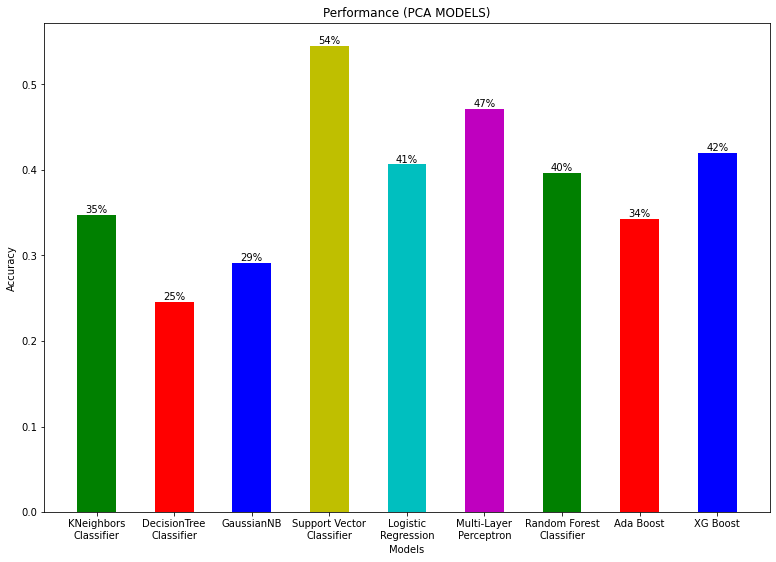

In [49]:
plt.figure(figsize=(13,9))
plt.bar(models,accuracy,width=0.5,color = ["g","r","b","y","c","m","g","r","b"])
for i in range(len(accuracy)):
    plt.text(i,accuracy[i],str(round(accuracy[i]*100))+"%",ha="center",va="bottom") # (x_coord,y_coord,value,)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Performance (PCA MODELS)")
plt.show()